# Import Libraries

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
import warnings; warnings.simplefilter('ignore')

- Load and Preprocess SETI Data

In [2]:
train_images = pd.read_csv('C:\\Users\\Downloads\\Deep_Learning_Test\\SETI_dataset\\train\\images.csv', header=None)
train_labels = pd.read_csv('C:\\Users\\Downloads\\Deep_Learning_Test\\SETI_dataset\\train\\labels.csv', header=None)
val_images = pd.read_csv('C:\\Users\\Downloads\\Deep_Learning_Test\\SETI_dataset\\valid\\images_2.csv', header=None)
val_labels = pd.read_csv('C:\\Users\\Downloads\\Deep_Learning_Test\\SETI_dataset\\valid\\labels_2.csv', header=None)

In [3]:
train_images.head()

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,...,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,...,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,...,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510
3,0.705882,0.674510,0.654902,0.678431,0.666667,0.662745,0.678431,0.662745,0.686275,0.686275,...,0.639216,0.662745,0.631373,0.643137,0.705882,0.662745,0.705882,0.666667,0.654902,0.631373
4,0.647059,0.729412,0.701961,0.674510,0.611765,0.698039,0.713726,0.662745,0.701961,0.674510,...,0.639216,0.670588,0.705882,0.674510,0.721569,0.694118,0.674510,0.705882,0.749020,0.729412


In [4]:
train_labels.head()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [5]:
train_images.shape, train_labels.shape

((3200, 8192), (3200, 4))

In [6]:
val_images.shape, val_labels.shape

((800, 8192), (800, 4))

In [7]:
X_train = train_images.values.reshape(3200, 64, 128, 1)
X_val = val_images.values.reshape(800, 64, 128, 1)
Y_train = train_labels.values
Y_val = val_labels.values

# Plot 2D Spectrograms

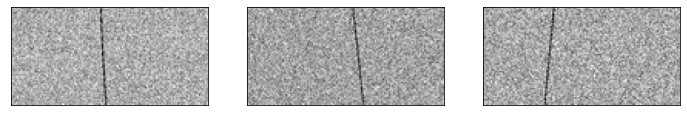

In [8]:
plt.figure(0, figsize=(12,12))
for i in range(1,4):
    plt.subplot(1,3,i)
    img = np.squeeze(X_train[np.random.randint(0, X_train.shape[0])])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')

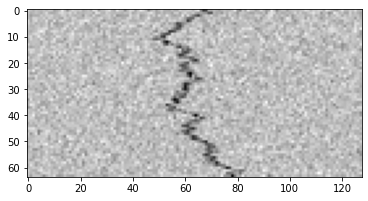

In [10]:
plt.imshow(np.squeeze(X_train[3]), cmap="gray");

# Create Training and Validation Data Generators

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen_train = ImageDataGenerator(horizontal_flip = True)
datagen_train.fit(X_train)
datagen_val = ImageDataGenerator(horizontal_flip= True)
datagen_val.fit(X_val)

# Creating the CNN Model

In [12]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

In [13]:
# Initialising the CNN
model = Sequential()

# 1st Convolution
model.add(Conv2D(32,(5,5), padding='same', input_shape=(64, 128,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(64,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(4, activation='softmax'))

# Learning Rate Scheduling and Compile the Model

In [14]:
initial_learning_rate = 0.005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=5,
    decay_rate=0.96,
    staircase=True)

optimizer = Adam(learning_rate=lr_schedule)

In [15]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 128, 32)       832       
                                                                 
 batch_normalization (BatchN  (None, 64, 128, 32)      128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64, 128, 32)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 64, 64)        5

# Training the Model

In [18]:
from livelossplot.tf_keras import PlotLossesCallback

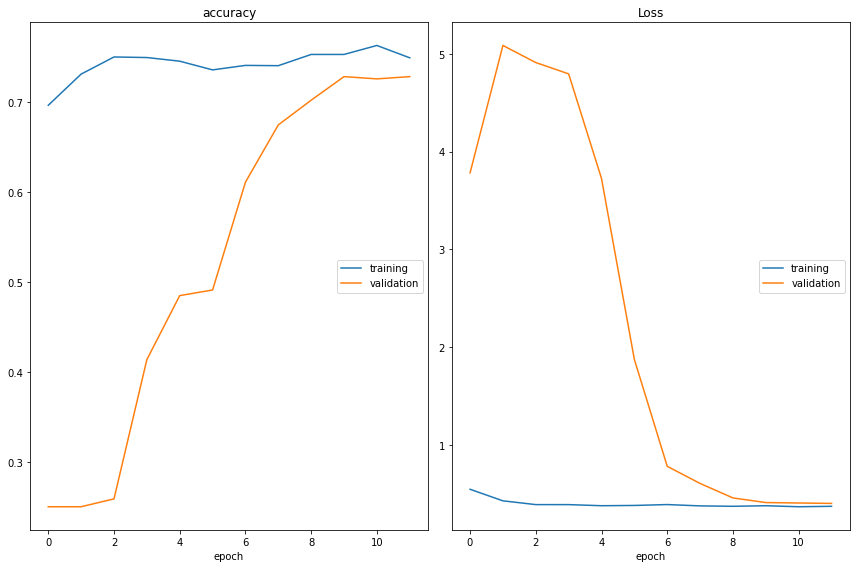

accuracy
	training         	 (min:    0.697, max:    0.763, cur:    0.750)
	validation       	 (min:    0.250, max:    0.729, cur:    0.729)
Loss
	training         	 (min:    0.371, max:    0.549, cur:    0.375)
	validation       	 (min:    0.405, max:    5.085, cur:    0.405)
100/100 [==============================] - 120s 1s/step - loss: 0.3752 - accuracy: 0.7497 - val_loss: 0.4048 - val_accuracy: 0.7287


In [21]:
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_loss',
                             save_weights_only=True, mode='min', verbose=0)
callbacks = [PlotLossesCallback(), checkpoint]#, reduce_lr]
batch_size = 32
history = model.fit(
    datagen_train.flow(X_train, Y_train, batch_size=batch_size, shuffle=True),
    steps_per_epoch=len(X_train)//batch_size,
    validation_data = datagen_val.flow(X_val, Y_val, batch_size=batch_size, shuffle=True),
    validation_steps = len(X_val)//batch_size,
    epochs=12,
    callbacks=callbacks
)

# Model Evaluation

In [23]:
model.evaluate(X_val, Y_val)

25/25 [==============================] - 6s 224ms/step - loss: 0.4004 - accuracy: 0.7300


[0.4004189372062683, 0.7300000190734863]

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

y_true = np.argmax(Y_val, 1)
y_pred = np.argmax(model.predict(X_val), 1)
print(metrics.classification_report(y_true, y_pred))
print("Classification accuracy: %0.6f" % metrics.accuracy_score(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       200
           1       0.48      0.77      0.59       200
           2       0.45      0.21      0.29       200
           3       1.00      1.00      1.00       200

    accuracy                           0.73       800
   macro avg       0.73      0.73      0.71       800
weighted avg       0.73      0.73      0.71       800

Classification accuracy: 0.730000


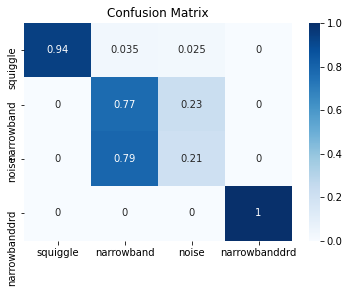

In [25]:
labels = ["squiggle", "narrowband", "noise", "narrowbanddrd"]

ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_true, y_pred, normalize='true'), annot=True, ax = ax, cmap=plt.cm.Blues); #annot=True to annotate cells

# labels, title and ticks
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);